## Import Libraries and Dependencies

In [15]:
# Import our dependencies
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import tensorflow as tf

In [2]:
# Load the data
file_path = Path("resources/processed_stroke_db.csv")
df = pd.read_csv(file_path, index_col=[0])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


### WIP: One-hot Encoding for Categotical Data & StandScaler for Numerical Data

In [ ]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.{column_name}.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['{column_name}'])
encode_df.head()

# Merge the two DataFrames together and drop the Country column
df.merge(encode_df,left_index=True,right_index=True).drop("{column_name}",1)

In [ ]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
scaler.fit(df)

# Scale the data
scaled_data = scaler.transform(df)

# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
transformed_scaled_data.head()

## Single Neuron / Single Layer Neural Network

In [3]:
nn_df = df.drop(["stroke"], axis="columns")
nn_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


### WIP: Need to fit data into workable dataset

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

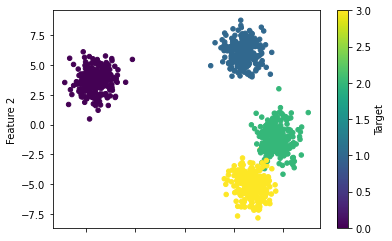

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="viridis")

### Train, Fit, Evaluate, Predict Model

In [5]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: -0.3746 - accuracy: 0.2613
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: -0.4779 - accuracy: 0.2467
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: -0.5830 - accuracy: 0.2467
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: -0.6904 - accuracy: 0.2467
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: -0.7993 - accuracy: 0.2467
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: -0.9095 - accuracy: 0.2467
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: -1.0220 - accuracy: 0.2467
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: -1.1369 - accuracy: 0.2467
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: -1.2545 - accuracy: 0.2467
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: -1.3735 - accuracy: 0.2467

24/24 [==============================] - 0s 1ms/step - loss: -19.7067 - accuracy: 0.2467
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: -20.1120 - accuracy: 0.2467
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: -20.5086 - accuracy: 0.2467
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: -20.9064 - accuracy: 0.2467
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: -21.3201 - accuracy: 0.2467
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: -21.7301 - accuracy: 0.2467
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: -22.1472 - accuracy: 0.2467
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: -22.5665 - accuracy: 0.2467
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: -22.9885 - accuracy: 0.2467
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: -23.4169 - accuracy: 

<AxesSubplot:>

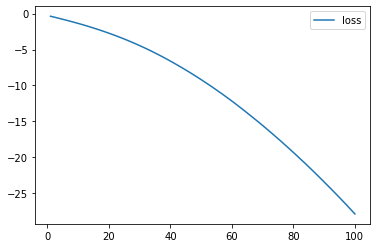

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

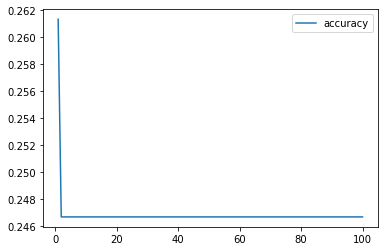

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: -2.9805e+01 - accuracy: 0.2600 - 138ms/epoch - 17ms/step
Loss: -29.804931640625, Accuracy: 0.25999999046325684


In [13]:
# Predict the classification of a new set of blob data
### Refactor Code for User Input
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## Multiple Neuron Single Layer Neural Network

In [ ]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

## Deep Learning Neural Network